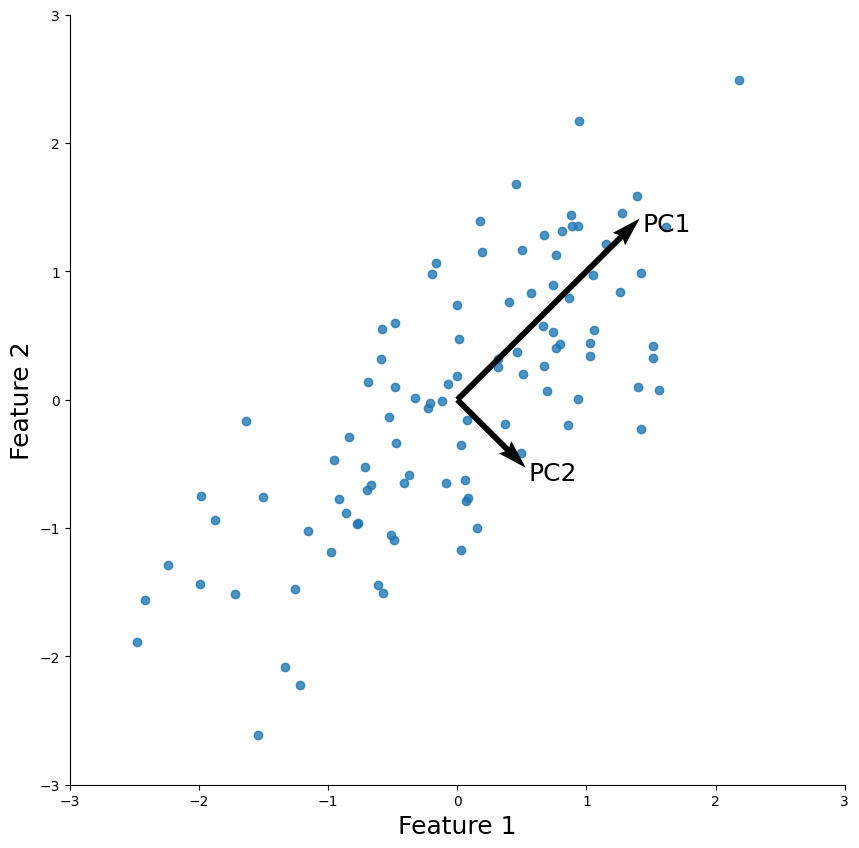

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
np.random.seed(0)
mean = [0, 0]
cov = [[0.8, 0.6], [0.6, 0.8]]  # diagonal covariance
X = np.random.multivariate_normal(mean, cov, 100)

# Standardize the data
X_std = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca.fit(X_std)

# Project the original data onto the principal component space
X_pca = pca.transform(X_std)

# Visualization
plt.figure(figsize=(10, 10))
ax = plt.gca()

# Plot original data
plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.8, label='Original Data')

# Plot and label principal components
for i, (length, vector) in enumerate(zip(pca.explained_variance_, pca.components_)):
    v = vector * 3 * np.sqrt(length)
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=2, color='k')
    plt.text(v[0]/2+0.4, v[1]/2+0.05, f'PC{i+1}', color='black', ha='right', va='top', fontsize=18)

# Set plot labels and title
plt.xlabel('Feature 1', fontsize=18)
plt.ylabel('Feature 2', fontsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

# Save the plot as a high-quality PNG file
plt.savefig('./figures/pca_visualization_labeled.png', format='png', dpi=300)
